

# <center> **TP2 INF4248 : RNN+LSTM+Timeseries**


---


<center> Members

 ## <center> **Hapi Kamgang Franck  ( 18T2418 )**
 ## <center> **Ngoran Aristide Fondzela ( 20V2896 )**
 ## <center> **NUNMUA SONTSA Belvanie Kartel ( 19M2319 )**

---





In [1]:
#Connextion de colab au google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importation des bibliotheques

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


In [3]:
# Importation des donnees d'entrainement

training_data = pd.read_csv('/content/drive/MyDrive/FB_training_data.csv')

In [4]:
training_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...,...
1253,2019-12-24,206.300003,206.789993,205.000000,205.119995,205.119995,6046300
1254,2019-12-26,205.570007,207.820007,205.309998,207.789993,207.789993,9350700
1255,2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200
1256,2019-12-30,207.860001,207.899994,203.899994,204.410004,204.410004,10524300


In [5]:
# Transformer les donnees en un tableau numpy
training_data = training_data.iloc[:, 1].values

In [6]:
type(training_data)

numpy.ndarray

### Pretraitement: standardisation et normalisation

In [7]:
# Appliquer la mise à l'échelle sur l'ensemble de données

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [8]:
x_training_data = []
y_training_data =[]

for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

# Transformer les listes en des numpy array
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [9]:
print(x_training_data.shape)
print(y_training_data.shape)

(1218, 40)
(1218,)


In [10]:
#Remodeler le tableau NumPy pour répondre aux normes TensorFlow
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],
                                               x_training_data.shape[1],
                                               1))

In [11]:
print(x_training_data.shape)

(1218, 40, 1)


In [12]:
#Importer les librairies TensorFlow
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

In [13]:
# Initialiser notre reseau de neurone recurent
rnn = Sequential()

# units = nombre de neurones LSTM a utiliser dans cette couche
# return_sequences permet de savoir si une autre couche sera inclure, raison du False lorsque la derniere couche est ajoutee
# input_shape designe le nombre de pas (40 ici) et le nombre de predicteur(1 ici) de nos donnees d'entrainement

# Dropout : La régularisation des abandons est une technique utilisée pour éviter le surapprentissage lors de la formation des réseaux de neurones
# Le taux d'abandon indique combien de neurones doivent être abandonnés dans une couche spécifique du réseau neuronal(20% ici).

# Ajouter la premiere couche LSTM
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))
rnn.add(Dropout(0.2)) #Effectuer une régularisation des sortis

# Ajouter trois(03) autres couches(couches cachees)
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = False))
rnn.add(Dropout(0.2))

# Ajouter la couche de sortie
rnn.add(Dense(units = 1))

# Compiler le reseau de neuronne recurent
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrainer le reseau de neurone recurent
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 12s 79ms/step - loss: 0.0468
Epoch 2/100
39/39 [==============================] - 4s 101ms/step - loss: 0.0087
Epoch 3/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0065
Epoch 4/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0064
Epoch 5/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0063
Epoch 6/100
39/39 [==============================] - 4s 99ms/step - loss: 0.0057
Epoch 7/100
39/39 [==============================] - 5s 134ms/step - loss: 0.0058
Epoch 8/100
39/39 [==============================] - 3s 77ms/step - loss: 0.0059
Epoch 9/100
39/39 [==============================] - 3s 78ms/step - loss: 0.0054
Epoch 10/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0053
Epoch 11/100
39/39 [==============================] - 4s 94ms/step - loss: 0.0061
Epoch 12/100
39/39 [==============================] - 3s 79ms/step - loss: 0.0054
Epoch 13/100
39/39 [

Apres l'entrainement de notre reseau de neuronne, la Loss function va quitter de 0.0468 a 0.0016.

In [ ]:
# Importer les donnees de test
test_data = pd.read_csv('/content/drive/MyDrive/FB_test_data.csv')

test_data = test_data.iloc[:, 1].values

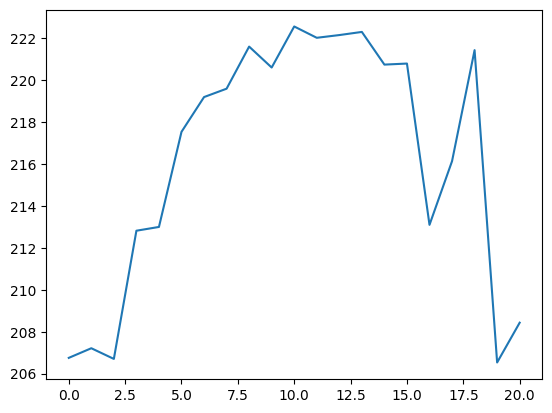

In [ ]:
plt.plot(test_data)

In [ ]:
#Créer des données d'entraînement non mises à l'échelle et tester les données
unscaled_training_data = pd.read_csv('/content/drive/MyDrive/FB_training_data.csv')
unscaled_test_data = pd.read_csv('/content/drive/MyDrive/FB_test_data.csv')

#Concaténer les données non mises à l'échelle
all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)

#Crée la variable x_test_data, qui a chaque jour de janvier + les 40 jours précédents
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
x_test_data = np.reshape(x_test_data, (-1, 1))

#Scale the test data
x_test_data = scaler.transform(x_test_data)

#Grouper nos donnees de test
final_x_test_data = []

for i in range(40, len(x_test_data)):

    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

#Remodeler le tableau NumPy pour répondre aux normes TensorFlow
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0],

                                               final_x_test_data.shape[1],

                                               1))

# Generer nos valeurs predictes
predictions = rnn.predict(final_x_test_data)

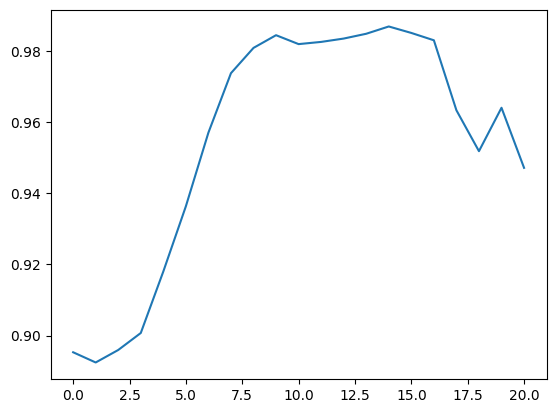

In [ ]:
plt.clf()
plt.plot(predictions)

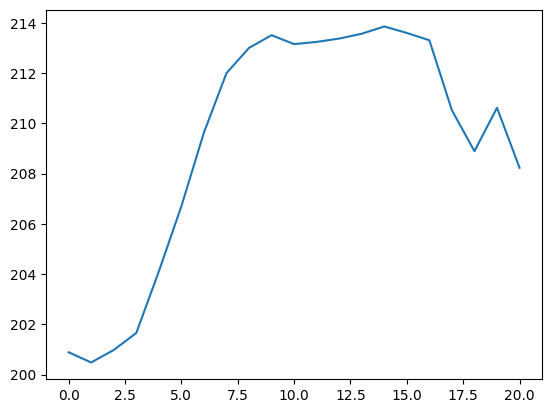

In [ ]:
# Denormaliser les valeurs prédites et retracer la courbe
unscaled_predictions = scaler.inverse_transform(predictions)
plt.clf()
plt.plot(unscaled_predictions)

Meme avec les donnees non normalisees, la prediction est la meme que celle des donnees normalisees.

Text(0.5, 1.0, 'Facebook Stock Price Predictions')

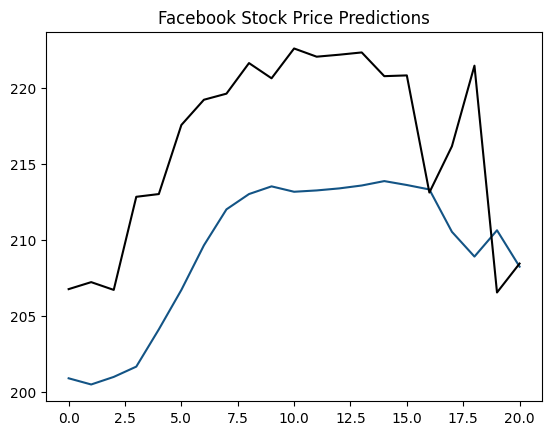

In [ ]:
#Courbes des valeurs prédites par rapport aux valeurs réelles de Facebook
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('Facebook Stock Price Predictions')

On remarque que la prediction etait approximativement correcte dans l'ensemble. Cependant on observe une grande difference apres une certaine valeur (15).